In [69]:
from bs4 import BeautifulSoup
from csv import writer
import requests
import csv
from lxml import html
import pandas as pd
import numpy as np
import seaborn as sns

In [70]:
pages = int(input()) 
print('Finding...\n') 
url = 'https://www.yellowpages.com/atlanta-ga/restaurants' 
#url = 'http://www.yellowpages.com/atlanta-ga/search?search_terms=Seafood+Restaurants&geo_location_terms=San+Francisco%2CCA'

fb_dv=[]

for page in range(pages): 
    next_page = url + '?page={}'.format(page+1) 
    r = requests.get(next_page) 
    soup = BeautifulSoup(r.content, "lxml") 
    data = soup.select('.info')
    
try:
 for business in data: 
                Name =business.find_all('a', {'class': 'business-name'})[0].text
                Addr =business.find_all('p', {'class': 'adr'})[0].text
                #Addr1=business.find_all('p', {'class': 'street-address'})[0].text
                Cate =business.find_all('div', {'class': 'categories'})[0].text.replace(',',' ')
                Ph =  business.find_all('div', {'class': 'phone'})[0].text
                newdt={"Name": Name, "Addr":Addr,"Cate":Cate,"Ph":Ph}
                fb_dv.append(newdt)
 with open ('yp.csv','w+') as file:
        writer = csv.DictWriter(file,fieldnames ={"Name","Addr","Cate","Ph"},delimiter =",")
        writer.writeheader()
        for i in fb_dv:
            writer.writerow(i)
except: 
      pass 
print('end of search;')                            
#nf=pd.DataFrame.from_dict(fb_db,orient='index',columns =['Name','Address','Cate','Phone'])

1
Finding...

end of search;


df1=pd.read_csv('yp.csv')
df1

In [71]:
df1=pd.read_csv('yp.csv')
#df1[['Addr']] = df1.Addr.fillna('1')
df1

,Ph,Name,Cate,Addr
0,(678) 479-7499,kingcannon all in one cafe,Coffee & TeaHealth & Diet Food ProductsGrocery...,"1544 Tara Rd, Jonesboro, GA 30238"
1,(404) 524-9224,Ray's In The City,RestaurantsSushi BarsAmerican Restaurants,NaN
2,(404) 334-2850,Basil's Restaurant & Tapas Bar,RestaurantsSteak HousesSeafood Restaurants,NaN
3,(678) 999-7059,Agatha's,RestaurantsTheatresAmerican Restaurants,NaN
4,(678) 292-6569,Cook Daddy's,RestaurantsAmerican RestaurantsBarbecue Restau...,NaN
5,(404) 237-2663,Bone's Restaurant,RestaurantsAmerican RestaurantsBars,NaN
6,(404) 266-9988,Fogo de Chao,RestaurantsFine Dining RestaurantsSteak Houses,NaN
7,(404) 688-1828,The Vortex,RestaurantsAmerican RestaurantsBars,NaN
8,(404) 262-3165,Atlanta Fish Market,RestaurantsSushi BarsFish & Seafood Markets,NaN
9,(404) 262-1162,The Capital Grille,RestaurantsFine Dining RestaurantsSeafood Rest...,NaN


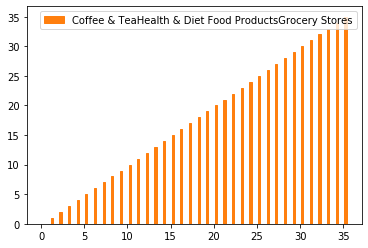

In [87]:
r1=np.arange(len(df1[['Cate']]))
wdth=0.25
r2 = [x + wdth for x in r1]
ln=df1['Cate'].unique()
explode = (0, 0, 0, 0,  0.6)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
plt.bar(r2,r1 , color="#ff7f0e", width=wdth, edgecolor='#ff7f0e',label=ln) 
plt.legend(ln,loc='upper right')
plt.show()

# 